In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
covid_stats=pd.read_csv("covid-statistics-by-us-states-daily-updates.csv")

In [18]:
covid_stats.columns

Index(['Unnamed: 0', 'date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedcurrently', 'hospitalizedcumulative', 'inicucurrently',
       'inicucumulative', 'onventilatorcurrently', 'onventilatorcumulative',
       'recovered', 'dataqualitygrade', 'lastupdateet', 'datemodified',
       'checktimeet', 'death', 'hospitalized', 'datechecked',
       'totaltestsviral', 'positivetestsviral', 'negativetestsviral',
       'positivecasesviral', 'deathconfirmed', 'deathprobable', 'fips',
       'positiveincrease', 'negativeincrease', 'total', 'totaltestresults',
       'totaltestresultsincrease', 'posneg', 'deathincrease',
       'hospitalizedincrease', 'hash', 'commercialscore',
       'negativeregularscore', 'negativescore', 'positivescore', 'score',
       'grade'],
      dtype='object')

In [19]:
covid_stats=covid_stats.drop(['Unnamed: 0', 'posneg', 'hash', 'commercialscore', 'negativeregularscore',
                             'negativescore', 'positivescore', 'grade', 'score','dataqualitygrade',
                              'lastupdateet', 'datemodified','checktimeet', 'datechecked', 'fips', 'hash',
                              'commercialscore','negativeregularscore', 'negativescore', 'positivescore',
                              'score', 'grade'], 
                             axis=1)

In [20]:
covid_stats.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedcurrently', 'hospitalizedcumulative', 'inicucurrently',
       'inicucumulative', 'onventilatorcurrently', 'onventilatorcumulative',
       'recovered', 'death', 'hospitalized', 'totaltestsviral',
       'positivetestsviral', 'negativetestsviral', 'positivecasesviral',
       'deathconfirmed', 'deathprobable', 'positiveincrease',
       'negativeincrease', 'total', 'totaltestresults',
       'totaltestresultsincrease', 'deathincrease', 'hospitalizedincrease'],
      dtype='object')

In [21]:
covid_stats=covid_stats[covid_stats.state=='NY']

In [22]:
covid_stats=covid_stats.drop(['state'], axis=1)

In [23]:
covid_stats.columns

Index(['date', 'positive', 'negative', 'pending', 'hospitalizedcurrently',
       'hospitalizedcumulative', 'inicucurrently', 'inicucumulative',
       'onventilatorcurrently', 'onventilatorcumulative', 'recovered', 'death',
       'hospitalized', 'totaltestsviral', 'positivetestsviral',
       'negativetestsviral', 'positivecasesviral', 'deathconfirmed',
       'deathprobable', 'positiveincrease', 'negativeincrease', 'total',
       'totaltestresults', 'totaltestresultsincrease', 'deathincrease',
       'hospitalizedincrease'],
      dtype='object')

In [24]:
covid_stats=covid_stats.sort_values(by=['date'])


In [25]:
population = float(19453556)
covid_stats['day_count'] = list(range(1,len(covid_stats)+1))

In [26]:
covid_stats[covid_stats['day_count']==1]

,date,positive,negative,pending,hospitalizedcurrently,hospitalizedcumulative,inicucurrently,inicucumulative,onventilatorcurrently,onventilatorcumulative,...,deathconfirmed,deathprobable,positiveincrease,negativeincrease,total,totaltestresults,totaltestresultsincrease,deathincrease,hospitalizedincrease,day_count
8138,2020-03-04,6.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0,0,78,54,0,0,0,1


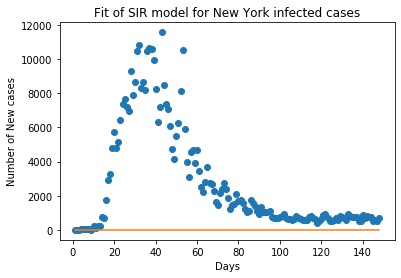

Optimal parameters: beta = 1.0  and gamma =  1.0


In [27]:
import numpy as np
from scipy import integrate, optimize
ydata = [i for i in covid_stats.positiveincrease]
xdata = covid_stats.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for New York infected cases")
plt.ylabel("Number of New cases")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

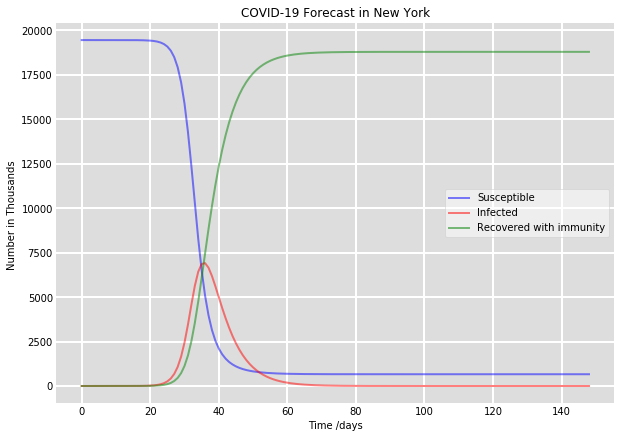

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 19453556
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.7, 0.2 
# A grid of time points (in days)
t = np.linspace(0, 148, 148, dtype=int)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number in Thousands ')
ax.set_title('COVID-19 Forecast in New York')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
fig.set_size_inches(10, 7)    
plt.show()